In [32]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [8, 6]
%matplotlib notebook

# Filepath
filepath = 'data/Fluo-N2DL-HeLa'

<IPython.core.display.Javascript object>


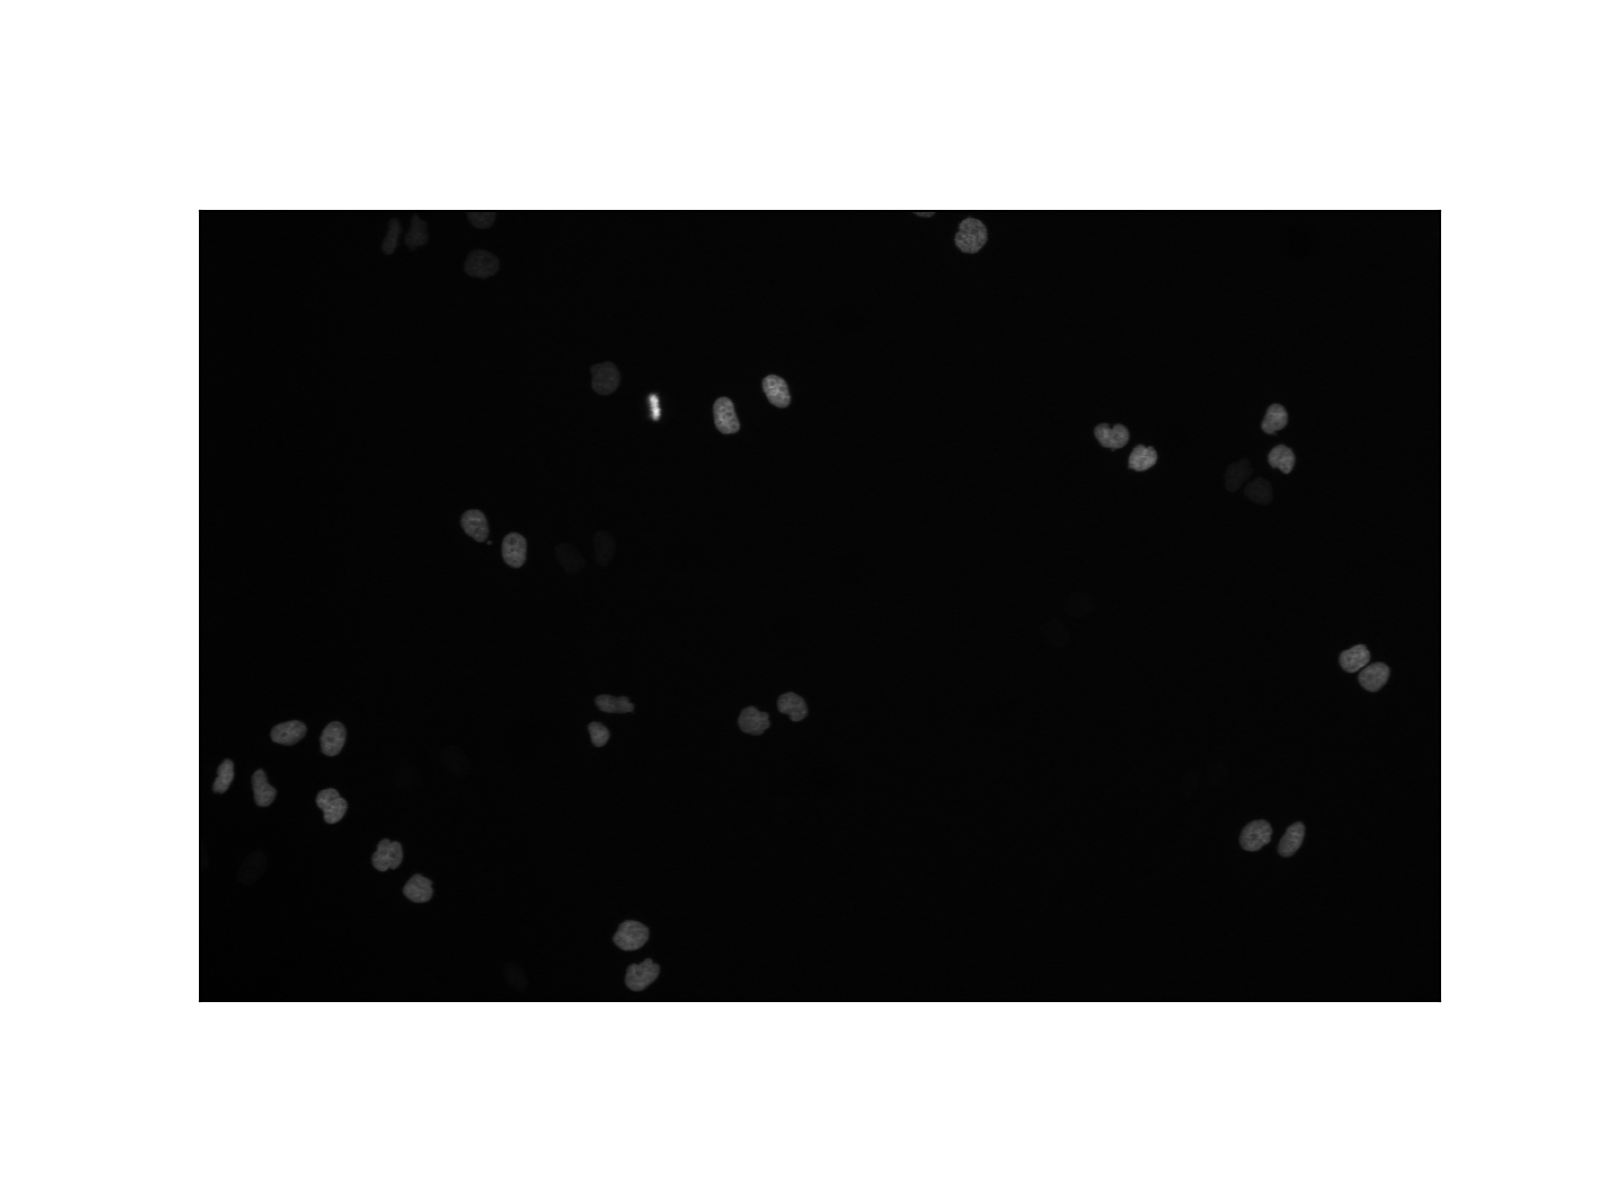

In [35]:
# Load an example image
array = np.array(Image.open(f'{filepath}/01/t001.tif'))

plt.figure()
plt.imshow(array, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.show()